In [16]:
%pylab inline

import zap_util as z

import statsmodels.api as sm
import statsmodels.formula.api as smf
rmse = {}
z.set_style()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
df = z.get_imoveis_dataframe(False)

In [25]:
var_ignore = ['lat','lng','id_bairro_g']
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos'], ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: lat,preco,m2,id_bairro_g,lng


Fórmula: df.preco  ~ df.dm_esquina + C(df.quartos) + df.dm_closet + df.dist_saude_privada + df.dm_armario + df.se_anos_estudo + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_piscina + df.dm_playground + df.dist_centro_lng + df.dm_hidrometro + df.dm_seguranca + df.dist_trem + df.dist_lagoa + C(df.suites) + df.dm_sol_da_manha + df.area + df.dm_frente + df.dist_delegacia + df.dist_centro_lat + df.dm_blindex + df.dist_favela + df.dist_logradouro + df.dm_terraco + df.dm_salao_de_jogos + C(df.bairro_g) + df.se_idh + df.dist_centro + df.dm_sala_de_jantar + df.dm_dependencia + df.se_crm_violento + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + df.dm_jardim + df.garagem + df.dist_praia + df.dm_duplex + df.dm_andar_inteiro + df.dm_sol_da_tarde + df.condominio + df.dm_varanda + df.dm_triplex + df.dm_children_care + df.dm_quarto_de_empregada + df.se_renda + df.dm_andar_baix

In [26]:
lm = sm.formula.ols(f, df).fit()
rmse['default'] = z.rmse(lm.resid)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1035.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:36:35   Log-Likelihood:            -3.9240e+05
No. Observations:               53581   AIC:                         7.852e+05
Df Residuals:                   53363   BIC:                         7.872e+05
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------

In [27]:
z.print_autocorr(df,cols_excluded=var_ignore)

Coluna               | Autocorrelacionada com                            
se_anos_estudo       : ['se_idh(0.95)', 'se_renda(0.87)', 'se_perc_alfabetizacao(0.89)']
dm_frente            : ['dm_varanda(0.70)', 'dm_salao_de_festas(0.73)']  
dist_delegacia       : ['dist_centro(0.82)', 'dist_metro(0.87)']         
dist_centro_lng      : ['dist_delegacia(0.79)', 'dist_centro(0.97)', 'se_saneamento(-0.80)', 'dist_metro(0.92)']
preco                : ['area(0.71)', 'm2(0.71)']                        
se_saneamento        : ['dist_metro(-0.79)']                             
se_idh               : ['se_renda(0.77)', 'se_perc_alfabetizacao(0.89)'] 
dist_centro          : ['se_saneamento(-0.79)', 'dist_metro(0.96)']      
dist_trem            : ['dist_delegacia(0.74)', 'dist_centro_lat(0.91)', 'dist_centro(0.71)', 'dist_metro(0.79)']


In [39]:
var_ignore +=  ['id_bairro_g','se_anos_estudo','dm_frente',
    'dist_delegacia', 'dist_centro_lng','se_saneamento','se_idh',
    'dist_metro','preco','dist_centro_lat', 'dist_trem']
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [40]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,preco,lat,lng,dist_centro_lat,dist_trem,dm_frente,dist_delegacia,dist_centro_lng,m2,id_bairro_g,se_saneamento,se_idh,dist_metro


Fórmula: df.preco  ~ df.dm_esquina + C(df.quartos) + df.dm_closet + df.dist_saude_privada + df.dm_armario + df.se_crm_violento + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_piscina + df.dm_playground + df.dm_hidrometro + df.dm_seguranca + df.dist_lagoa + C(df.suites) + df.dm_sol_da_manha + df.area + df.dm_andar_inteiro + df.dm_linear + df.dm_blindex + df.dist_favela + df.dist_logradouro + df.dm_terraco + df.dm_salao_de_jogos + C(df.bairro_g) + df.dist_centro + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_saude_publica + df.dist_bombeiro + df.dm_jardim + C(df.garagem) + df.dist_praia + df.dm_duplex + df.dm_sol_da_tarde + df.condominio + df.dm_varanda + df.dm_triplex + df.dm_children_care + df.dm_quarto_de_empregada + df.se_renda + df.dm_an

In [41]:
lm = sm.formula.ols(f, df).fit()
rmse['w_autocorr'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:39:30   Log-Likelihood:            -3.9259e+05
No. Observations:               53581   AIC:                         7.856e+05
Df Residuals:                   53366   BIC:                         7.875e+05
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------

In [43]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
#bp.index = [i.replace('C(df.bairro_g)[T.', '').replace(']','')  for i in bp.index.tolist()]
c = plow > 0.05
plow = plow[c]
plow

C(df.bairro_g)[T.Acari]                   0.437302
C(df.bairro_g)[T.Alto da Boa Vista]       0.089625
C(df.bairro_g)[T.Andarai]                 0.130969
C(df.bairro_g)[T.Anil]                    0.637445
C(df.bairro_g)[T.Barra de Guaratiba]      0.121413
C(df.bairro_g)[T.Benfica]                 0.964724
C(df.bairro_g)[T.Cachambi]                0.229301
C(df.bairro_g)[T.Caju]                    0.559938
C(df.bairro_g)[T.Camorim]                 0.654010
C(df.bairro_g)[T.Campo dos Afonsos]       0.105845
C(df.bairro_g)[T.Catete]                  0.362910
C(df.bairro_g)[T.Catumbi]                 0.169223
C(df.bairro_g)[T.Cavalcanti]              0.644137
C(df.bairro_g)[T.Cidade Nova]             0.402906
C(df.bairro_g)[T.Cordovil]                0.181544
C(df.bairro_g)[T.Cosme Velho]             0.446265
C(df.bairro_g)[T.Del Castilho]            0.408031
C(df.bairro_g)[T.Deodoro]                 0.173151
C(df.bairro_g)[T.Encantado]               0.058516
C(df.bairro_g)[T.Engenho Novo] 

In [44]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
idx_not_bairro = plow.index.map(lambda x: x.find('df.bairro_g') == -1) 
var_ignore_too = map(lambda x: x.replace('df.',''), plow[idx_not_bairro].index.tolist())
var_ignore = var_ignore + var_ignore_too + ['bairro_g']

In [45]:
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [46]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,dm_sol_da_tarde,dm_andar_inteiro,preco,dist_delegacia,lng,dm_seguranca,dist_trem,dm_frente,dm_linear,dm_blindex,m2,id_bairro_g,bairro_g,se_idh,dm_children_care,dist_saude_publica,dm_jardim,lat,dist_centro_lat,dm_triplex,se_crm_roubo,dm_portaria,dm_cobertura,dist_centro_lng,dm_esquina,se_saneamento,dm_andar_baixo,dist_metro,dm_sol_da_manha


Fórmula: df.preco  ~ C(df.quartos) + df.dm_closet + C(df.suites) + df.dm_armario + df.se_crm_violento + df.dm_recuado + df.dm_fundos + df.dm_andar_alto + df.dm_mezanino + df.dm_piscina + df.dm_playground + df.dm_hidrometro + df.dist_lagoa + df.se_renda + df.area + df.dist_saude_privada + df.dist_favela + df.dist_logradouro + df.dm_salao_de_jogos + df.dist_centro + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_estacionamento_visitantes + df.dm_banheira + df.dist_bombeiro + C(df.garagem) + df.dist_praia + df.dm_duplex + df.condominio + df.dm_varanda + df.dm_terraco + df.dm_quarto_de_empregada + df.dm_lateral_ + d

In [47]:
lm = sm.formula.ols(f, df).fit()
rmse['w_unsignif_1'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2838.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:            -4.0232e+05
No. Observations:               53581   AIC:                         8.047e+05
Df Residuals:                   53531   BIC:                         8.052e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept 

In [49]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
c = plow > 0.05
plow = plow[c]
plow

C(df.quartos)[T.3]                 0.303333
df.dm_closet                       0.124524
df.dm_armario                      0.358110
df.dm_recuado                      0.269117
df.dm_mezanino                     0.167443
df.dist_lagoa                      0.108114
df.dm_estacionamento_visitantes    0.846547
df.dm_indevassavel                 0.067055
df.dm_elevador_privativo           0.800234
dtype: float64

In [50]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
var_ignore_too = map(lambda x: x.replace('df.',''), plow.index.tolist())
var_ignore_too = var_ignore_too[1:]
var_ignore = var_ignore + var_ignore_too

In [51]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dm_armario,se_anos_estudo,dm_recuado,dm_sol_da_tarde,dm_indevassavel,preco,dist_delegacia,dm_mezanino,lng,dm_seguranca,dist_trem,dist_lagoa,dm_frente,dm_linear,dm_blindex,m2,id_bairro_g,bairro_g,se_idh,dm_children_care,dm_estacionamento_visitantes,dist_saude_publica,dm_jardim,dm_andar_inteiro,lat,dist_centro_lat,dm_triplex,se_crm_roubo,dm_portaria,dm_cobertura,dist_centro_lng,dm_elevador_privativo,dm_esquina,se_saneamento,dm_andar_baixo,dist_metro,dm_sol_da_manha


Fórmula: df.preco  ~ C(df.quartos) + C(df.suites) + df.se_crm_violento + df.dm_fundos + df.dm_andar_alto + df.dm_piscina + df.dm_playground + df.dm_hidrometro + df.se_renda + df.area + df.dist_saude_privada + df.dist_favela + df.dist_logradouro + df.dm_salao_de_jogos + df.dist_centro + df.dm_sala_de_jantar + df.dm_dependencia + df.dm_banheira + df.dist_bombeiro + C(df.garagem) + df.dist_praia + df.dm_duplex + df.condominio + df.dm_varanda + df.dm_terraco + df.dm_quarto_de_empregada + df.dm_late

In [52]:
lm = sm.formula.ols(f, df).fit()
rmse['w_unsignif_2'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     3391.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        16:40:11   Log-Likelihood:            -4.0233e+05
No. Observations:               53581   AIC:                         8.047e+05
Df Residuals:                   53539   BIC:                         8.051e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

# Determinar se a Regresssão ou média simples é o melhor método.

In [54]:
modelo_rl = z.rmse(lm.resid)
modelo_media = z.rmse(df.preco-df.preco.mean())
if modelo_rl < modelo_media :
    print 'REGRESSAO WINS por {:.2f}%'.format((1-modelo_rl/modelo_media)*100)
else:
    print 'MEDIA WINS por {:.2f}%'.format((1-modelo_media/modelo_ml)*100)

REGRESSAO WINS por 47.27%


In [55]:
 modelo_rl , modelo_media

(441.37411757405715, 837.06779051662784)

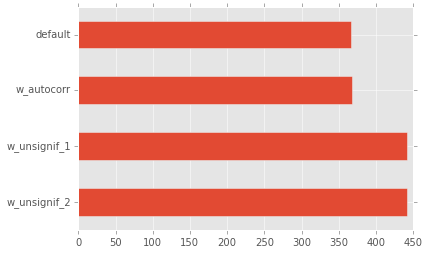

In [56]:
srmse = z.pd.Series(data=rmse.values(),index=rmse.keys())
srmse.sort(ascending=False)
srmse.plot(kind='barh');